In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')
train_data_dir = '/content/drive/MyDrive/17Flower/train'
test_data_dir = '/content/drive/MyDrive/17Flower/test'

Mounted at /content/drive


In [12]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    class_mode='categorical',
    shuffle = True,
    subset='validation')

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


In [13]:
VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in VGG16_model.layers:
  layer.trainable=False

model = Sequential([
    VGG16_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(17, activation='softmax')])

In [14]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
early_stop = EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1)

In [16]:
epochs = 35

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[early_stop],
    validation_data=validation_generator)

Epoch 1/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 1165s 40s/step - accuracy: 0.0923 - loss: 2.9096 - val_accuracy: 0.2947 - val_loss: 2.5781
Epoch 2/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 751s 26s/step - accuracy: 0.2708 - loss: 2.5641 - val_accuracy: 0.4947 - val_loss: 2.3148
Epoch 3/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 780s 27s/step - accuracy: 0.3997 - loss: 2.3286 - val_accuracy: 0.6105 - val_loss: 2.0620
Epoch 4/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 762s 26s/step - accuracy: 0.4297 - loss: 2.1240 - val_accuracy: 0.6632 - val_loss: 1.8388
Epoch 5/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 758s 26s/step - accuracy: 0.5013 - loss: 1.8949 - val_accuracy: 0.6632 - val_loss: 1.6471
Epoch 6/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 810s 27s/step - accuracy: 0.5100 - loss: 1.7881 - val_accuracy: 0.6526 - val_loss: 1.5196
Epoch 7/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 769s 27s/step - accuracy: 0.5405 - loss: 1.6434 - val_accuracy: 0.7158 - val_loss: 1.3572
Epoch 8/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 790s 26s/step - accuracy: 0.6205 - loss: 1.4360 - val_accuracy: 0

Found 340 images belonging to 17 classes.
11/11 ━━━━━━━━━━━━━━━━━━━━ 348s 33s/step


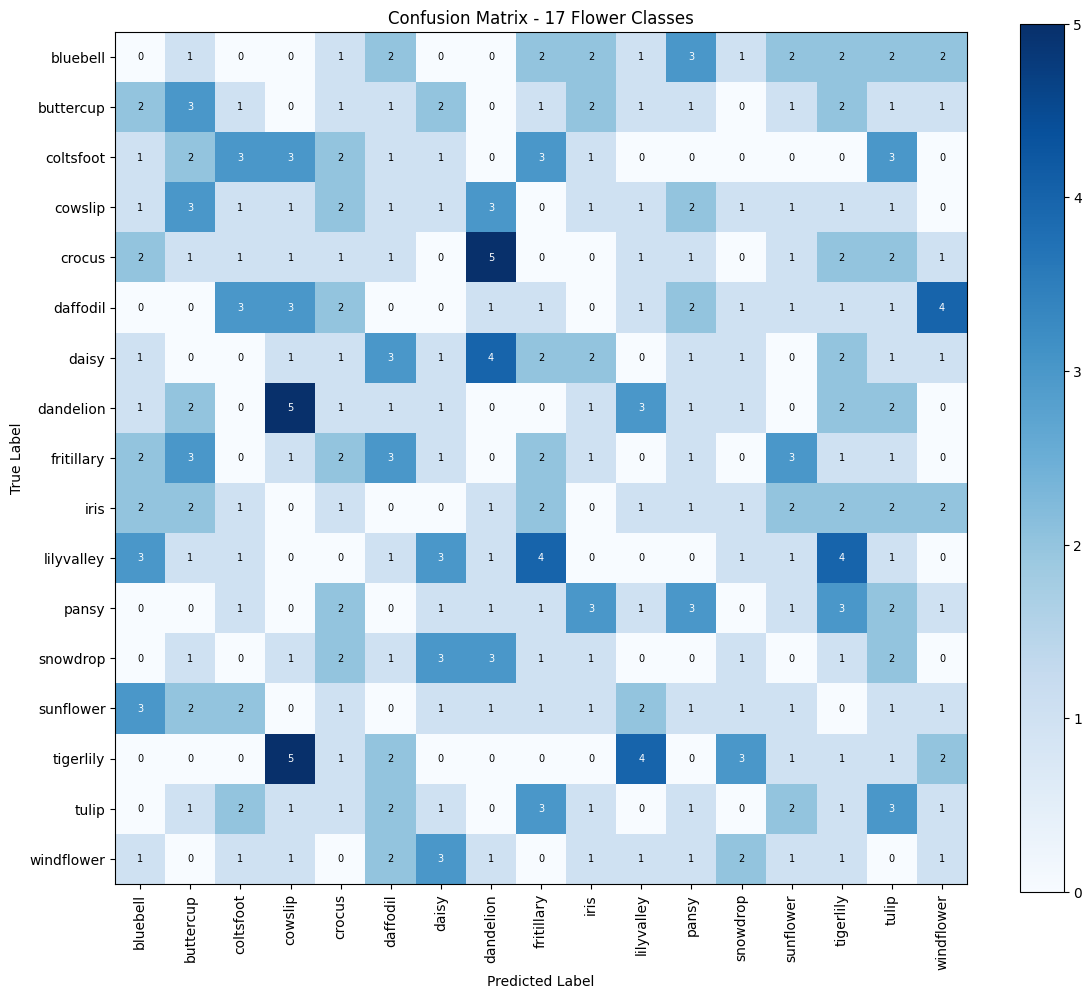

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dataset = test_datagen.flow_from_directory(
    test_data_dir,
    class_mode = 'categorical',
    shuffle = True)

label_flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
                'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

preds = model.predict(test_dataset, verbose=1)

Y_pred = np.argmax(preds, axis=1)
Y_true = test_dataset.classes

cm = confusion_matrix(Y_true, Y_pred)

plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - 17 Flower Classes')
plt.colorbar()

tick_marks = np.arange(len(label_flowers))
plt.xticks(tick_marks, label_flowers, rotation=90)
plt.yticks(tick_marks, label_flowers)

thresh = cm.max() / 2.
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=7)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

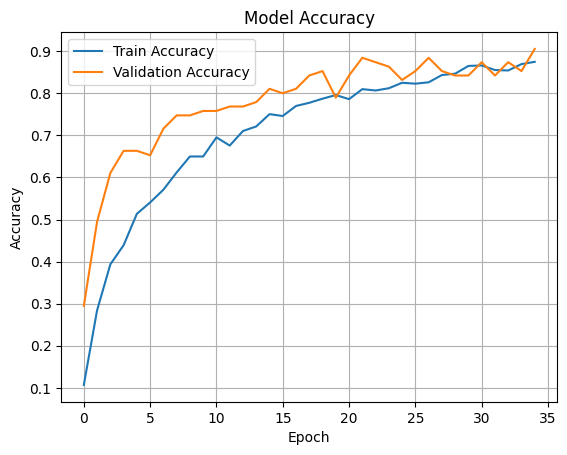

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

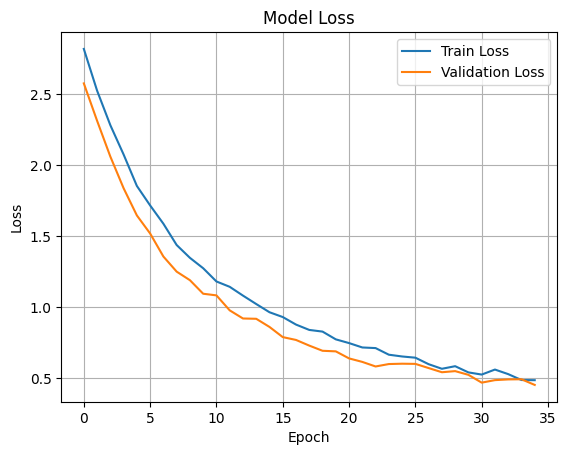

In [19]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step


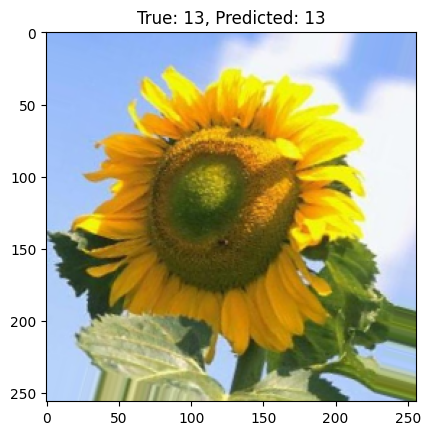

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x_val, y_val = next(validation_generator)

index = np.random.randint(0, len(x_val))
image = x_val[index]
true_label = np.argmax(y_val[index])

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(image)
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()

In [21]:
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Val Loss:", history.history['val_loss'][-1])
print("Val Accuracy:", history.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Train Loss: 0.48535528779029846
Train Accuracy: 0.8745945692062378
Val Loss: 0.4519299864768982
Val Accuracy: 0.9052631855010986
11/11 ━━━━━━━━━━━━━━━━━━━━ 237s 22s/step - accuracy: 0.8546 - loss: 0.5562
Test Loss: 0.5883917808532715
Test Accuracy: 0.8441176414489746
